In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits'],
      dtype='<U68')

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]


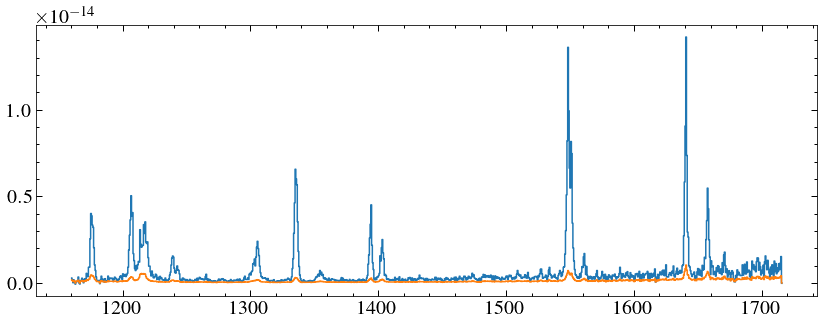

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]


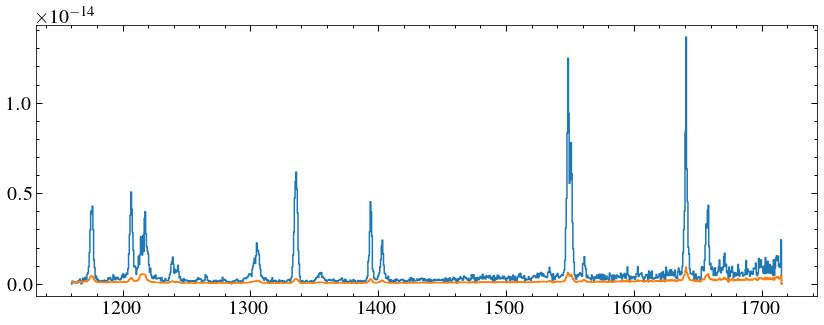

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]


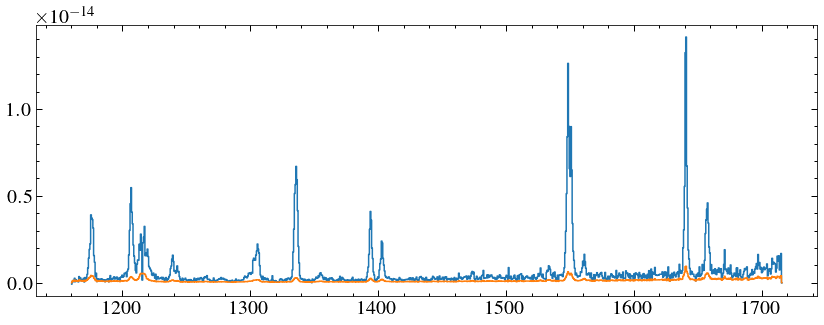

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]


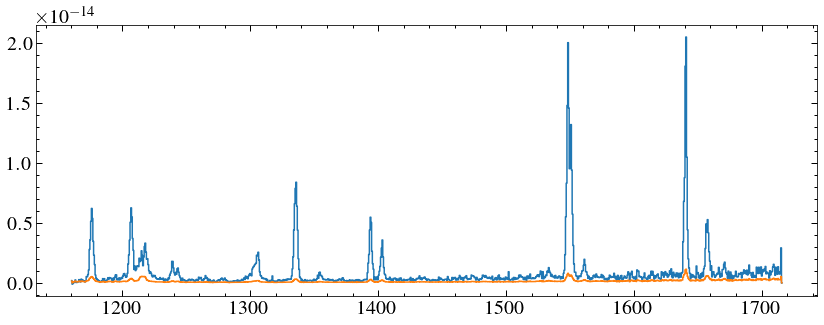

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]


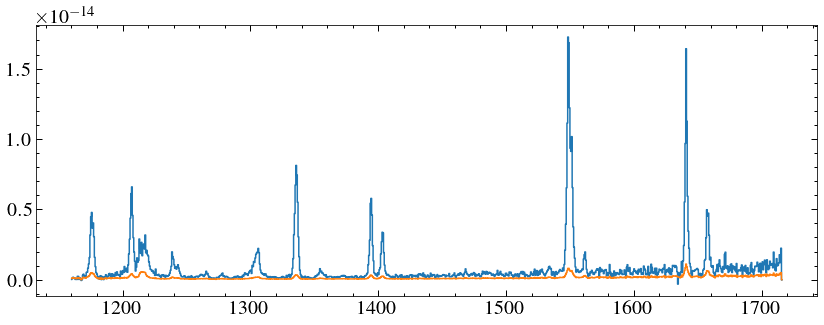

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]


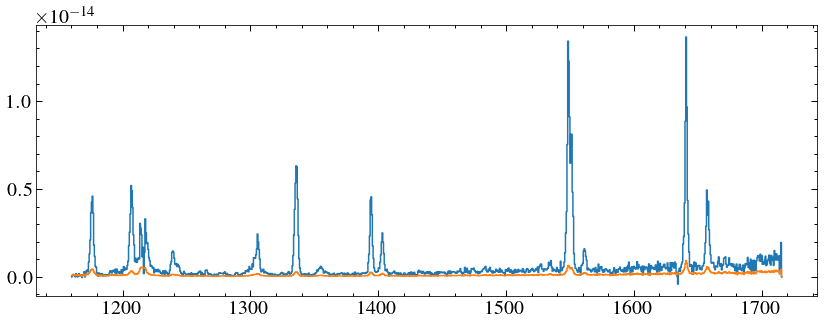

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits
G230L
[494.1262]


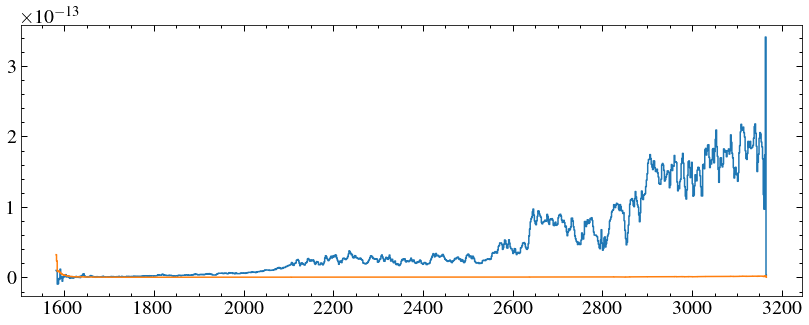

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits
G430L
[894.85034]


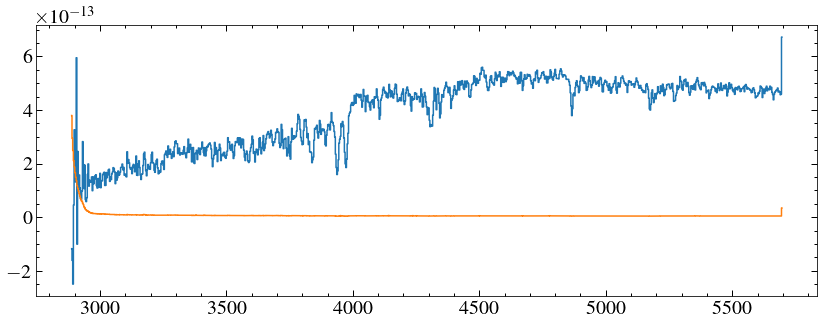

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


Wow! Any evidence for flares in G140L?

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]


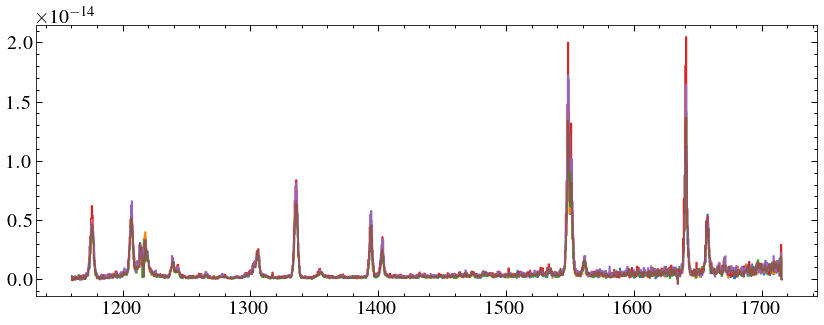

In [10]:
for x in x1ds[0:6]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()


No? Go back and have closer look in a bit

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits
G230L
[494.1262]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits
G430L
[894.85034]


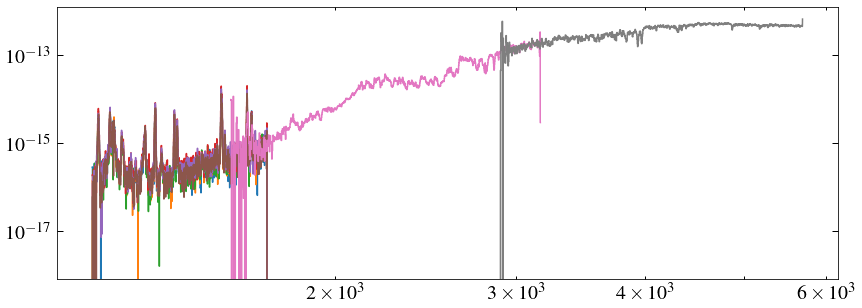

In [13]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()
plt.yscale('log')
plt.xscale('log')


In [14]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

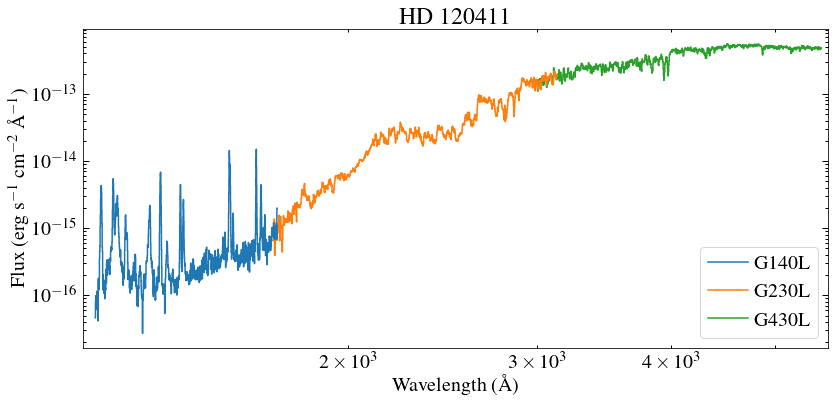

In [49]:
w_fuv = []
f_fuv = []
e_fuv = []

n=0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]


        
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
mask = (f_fuv > 0)
w_fuv, f_fuv, e_fuv = w_fuv[mask], f_fuv[mask], e_fuv[mask]


plt.figure(figsize=(12, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 120411')
plt.xlim(1130, 5600)
plt.tight_layout()
plt.savefig('plots/hd120411_ql.pdf')
plt.savefig('plots/HD-120411_ql.png', facecolor='w')

oeoo27010


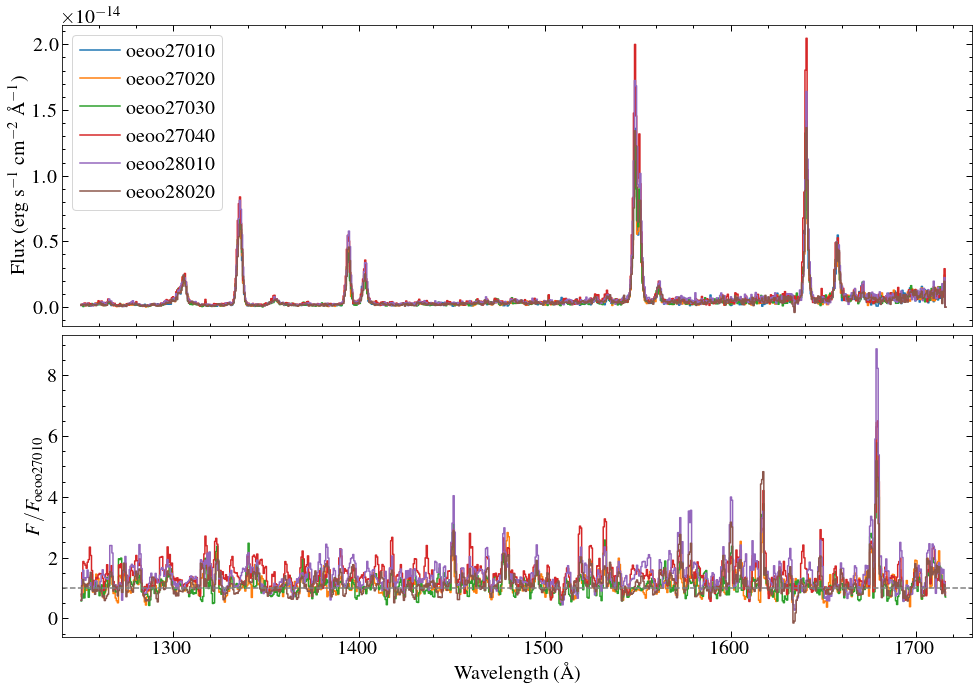

In [87]:
plt.figure(figsize=(14, 10))

plt.subplot(211)
for x in x1ds[0:6]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
plt.legend(frameon=True, loc=2)
plt.xticks(visible=False)
plt.xlim(1240, 1730)
    
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

plt.subplot(212)
n = 0
for x in x1ds[0:6]:  
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    if n == 0:
        wc, fc, ec = w, f, e
        root = fits.getheader(x, 0)['ROOTNAME']
        plt.plot([0,0], [0,0])
    else:
        ratio = f/fc
        ratio = convolve(ratio,  Box1DKernel(3))
        plt.step(w, ratio, where='mid')
    n +=1
    
plt.xlim(1240, 1730)

print(root)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('$F/F_{\mathrm{oeoo27010}}$')
plt.axhline(1, ls='--', c='0.5')
# plt.legend(frameon=True, loc=4)
# plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)
plt.savefig('plots/hd120411_varcheck.pdf')
plt.savefig('plots/HD-120411_varcheck.png', facecolor='w')

Mg ii lines?

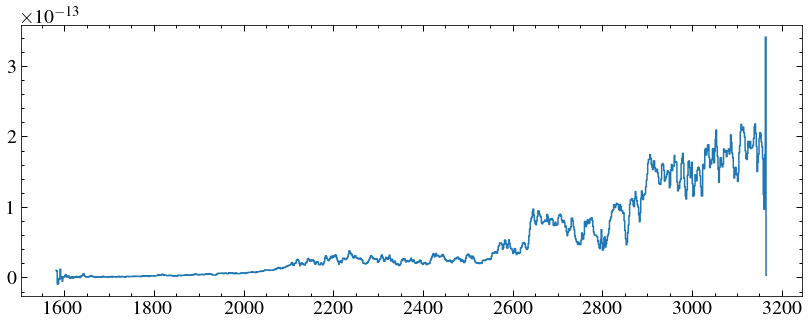

In [92]:
for x in x1ds[6:7]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
# plt.xlim(1240, 1730)